In [1]:
from scipy import stats
import random
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed(10)

population_ages1 = stats.poisson.rvs(loc=18, mu=30, size=150000) # Generate 15000 poisson rvs with mu equal to 48
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000) # Generate 10000 poisson rvs with mu equal to 28

population_ages = np.concatenate((population_ages1, population_ages2))
[round(x.mean(), 3) for x in (population_ages1, population_ages2, population_ages)]

[48.001, 27.997, 39.999]

In [3]:
sample_ages = np.random.choice(a=population_ages, size=500, replace=True)   # sampling with replacement, default

In [4]:
random.seed(10)

population_races = ['white']*100000 + ['black']*50000 + ['hispanic']*50000 + ['asian']*25000 + ['other']*25000
print(len(population_races))
print([population_races[x] for x in [0,100000, 150000, 200000, 225000]])

250000
['white', 'black', 'hispanic', 'asian', 'other']


In [5]:
demo_sample = random.sample(population=population_races, k=1000)    # without replacement
set(demo_sample)

for race in set(demo_sample):
    print(race + "'s proportion estimate : " + str(demo_sample.count(race)/1000)) 

other's proportion estimate : 0.099
hispanic's proportion estimate : 0.192
white's proportion estimate : 0.379
asian's proportion estimate : 0.099
black's proportion estimate : 0.231


#### Sampling Distributions & Central Limit Theorem

-0.05838318352527109


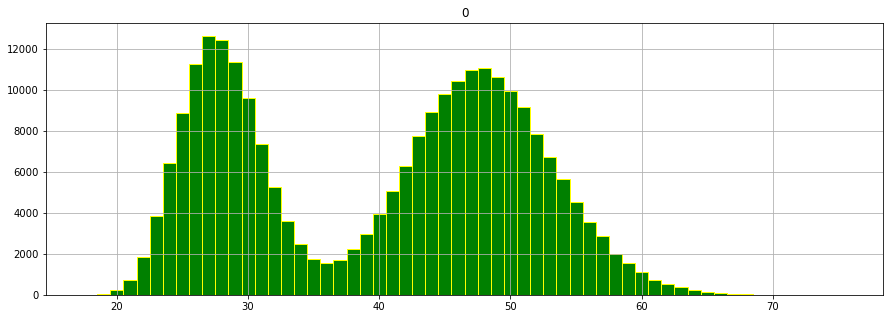

In [18]:
print(stats.skew(population_ages))

pd.DataFrame(data=population_ages).hist(bins=58, range=(17.5, 75.5), color='g', edgecolor='yellow', figsize=(15, 5))
plt.show()

##### The distribution has low skewness, but the plot reveals the data is clearly not normal: instead of one symmetric bell curve, it has as bimodal distribution with two high density peaks. The sample we drew from this populaton have roughly the shape and skew:

0.015634299216207747


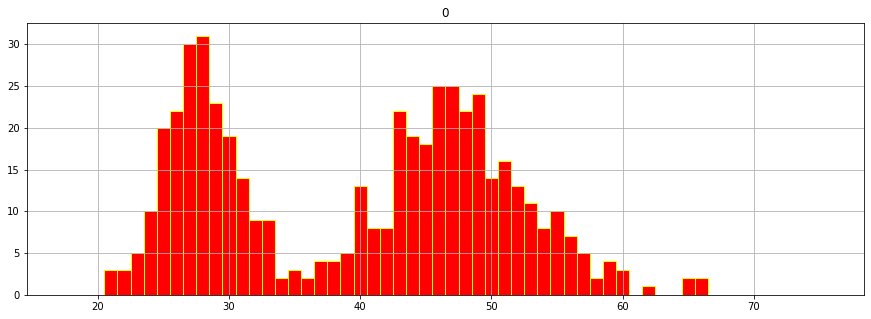

In [20]:
print(stats.skew(sample_ages))

pd.DataFrame(data=sample_ages).hist(bins=58, range=(17.5, 75.5), color='red', edgecolor='yellow', figsize=(15,5))
plt.show()

##### The sample has roughly the same shape as the underlying population. This suggests that we can't apply technique that assume a normal distribution to this data set, since it is not normal. In reality, we can, thanks the central limit theorem.<br><br>The central limit theorem is one of the most important results of probability theory and serves as the foundation of many methods of statistical analysis. At a high level, the theorem states the distribution of many sample means, known as a sampling distribution, will be normally distributed. As a result we can treat the sample mean as if it were drawn from normal distribution.<br><br>To illustrate, let's create a sampling distribution by taking 200 samples from our population and then making 200 point estimates of the mean: